# Importing Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 
# %matplotlib inline makes sure all the graphs are aligned properly

# Data Cleaning

In [2]:
df = pd.read_csv('Airbnb_data.csv')
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [3]:
# Changing column names to make more sense
rename_col = {'id':'listing_id','name':'listing_name','number_of_reviews':'total_reviews','calculated_host_listings_count':'host_listings_count'}
df = df.rename(columns = rename_col)
df.head()

,listing_id,listing_name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,total_reviews,last_review,reviews_per_month,host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   listing_id           48895 non-null  int64  
 1   listing_name         48879 non-null  object 
 2   host_id              48895 non-null  int64  
 3   host_name            48874 non-null  object 
 4   neighbourhood_group  48895 non-null  object 
 5   neighbourhood        48895 non-null  object 
 6   latitude             48895 non-null  float64
 7   longitude            48895 non-null  float64
 8   room_type            48895 non-null  object 
 9   price                48895 non-null  int64  
 10  minimum_nights       48895 non-null  int64  
 11  total_reviews        48895 non-null  int64  
 12  last_review          38843 non-null  object 
 13  reviews_per_month    38843 non-null  float64
 14  host_listings_count  48895 non-null  int64  
 15  availability_365     48895 non-null 

In [5]:
# Removing duplicates
df = df.drop_duplicates()
df.count()

listing_id             48895
listing_name           48879
host_id                48895
host_name              48874
neighbourhood_group    48895
neighbourhood          48895
latitude               48895
longitude              48895
room_type              48895
price                  48895
minimum_nights         48895
total_reviews          48895
last_review            38843
reviews_per_month      38843
host_listings_count    48895
availability_365       48895
dtype: int64

In [6]:
# Cheking NA counts in each column
df.isna().sum()

listing_id                 0
listing_name              16
host_id                    0
host_name                 21
neighbourhood_group        0
neighbourhood              0
latitude                   0
longitude                  0
room_type                  0
price                      0
minimum_nights             0
total_reviews              0
last_review            10052
reviews_per_month      10052
host_listings_count        0
availability_365           0
dtype: int64

In [7]:
# Addressing NA with suitable data or dropping if necessary
df['listing_name'].fillna('unknown',inplace=True)
df['host_name'].fillna('no_name',inplace=True)

df = df.drop(['last_review'],axis=1)

df['reviews_per_month'] = df['reviews_per_month'].replace(to_replace = np.nan, value=0).astype('int64')

In [10]:
# Checking NA counts again to make sure
df.isna().sum()

listing_id             0
listing_name           0
host_id                0
host_name              0
neighbourhood_group    0
neighbourhood          0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
total_reviews          0
reviews_per_month      0
host_listings_count    0
availability_365       0
dtype: int64

In [11]:
# Cheking unique counts in each column
df.nunique()

listing_id             48895
listing_name           47906
host_id                37457
host_name              11453
neighbourhood_group        5
neighbourhood            221
latitude               19048
longitude              14718
room_type                  3
price                    674
minimum_nights           109
total_reviews            394
reviews_per_month         22
host_listings_count       47
availability_365         366
dtype: int64

In [12]:
# Cheking stats of numeric columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
listing_id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
total_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,48895.0,8.062583e-01,1.502767e+00,0.00000,0.000000e+00,0.000000e+00,1.000000e+00,5.800000e+01
host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


# EDA

### Outlier Analysis

<AxesSubplot:xlabel='price'>

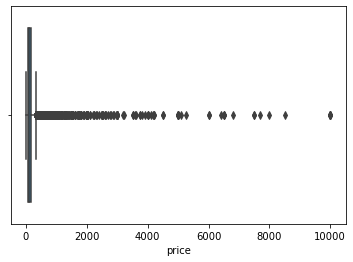

In [13]:
# Checking outliers in price column
sns.boxplot(x=df['price'])

In [14]:
# Defining method to remove the outliers
def iqr(df):
    q1 = np.percentile(df,25)
    q3 = np.percentile(df,75)
    iqr = q3 - q1
    lb = q1 - (1.5*iqr) # lb: lower bound
    ub = q3 + (1.5*iqr) # ub: upper bound
    return lb,ub

In [15]:
# Applying that method to price column to remove outliers
lb,ub = iqr(df['price'])
df1 = df[(df.price > lb) & (df.price<ub)]

<AxesSubplot:xlabel='price'>

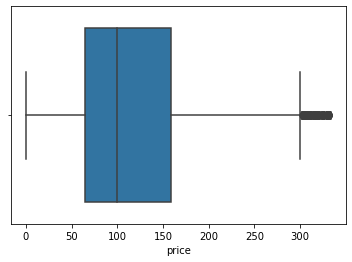

In [16]:
# Checking outliers in price column again to verify
sns.boxplot(x=df1['price'])

### Correlation Analysis

<AxesSubplot:>

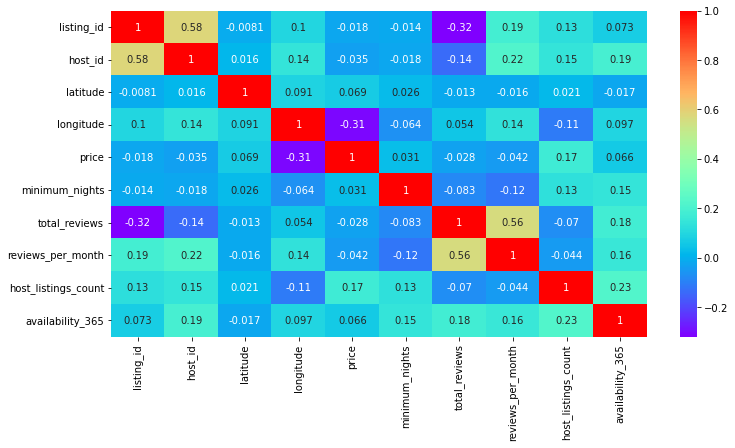

In [17]:
# Plotting correlation heatmap
corr = df1.corr()
plt.figure(figsize=(12,6))
sns.heatmap(corr, cmap='rainbow', annot=True)

### Calculate the average price of each room type

In [18]:
summary = df1.groupby('room_type')['price'].agg([np.mean, np.median, np.std])
summary

,mean,median,std
room_type,,,
Entire home/apt,162.489466,150,63.339807
Private room,79.018503,70,41.177512
Shared room,59.293497,45,42.832023


### Distribution of price

<AxesSubplot:xlabel='price', ylabel='Density'>

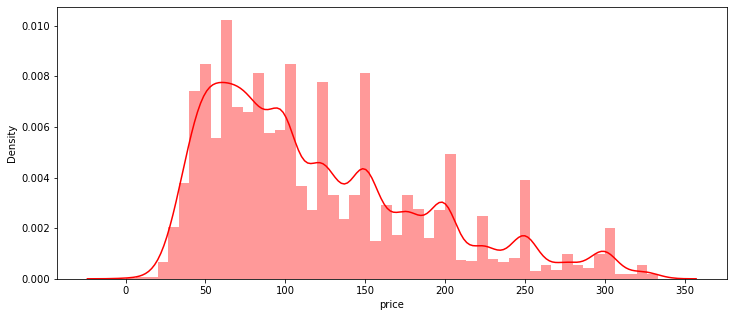

In [19]:
plt.figure(figsize=(12,5))
sns.distplot(df1['price'], color=('r'))

### Total listing/property count in each neighbourhood group using count plot

<AxesSubplot:xlabel='neighbourhood_group', ylabel='count'>

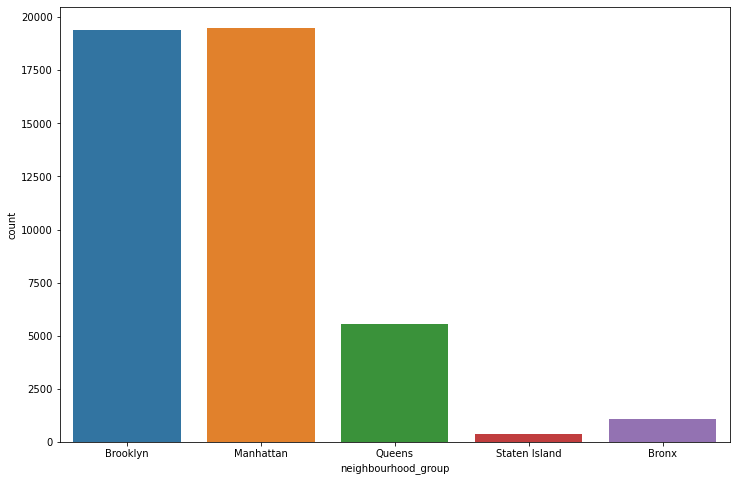

In [20]:
plt.figure(figsize=(12,8))
sns.countplot(data=df1, x= 'neighbourhood_group')

### Average price of each neighbourhood group using point plot

<AxesSubplot:xlabel='neighbourhood_group', ylabel='price'>

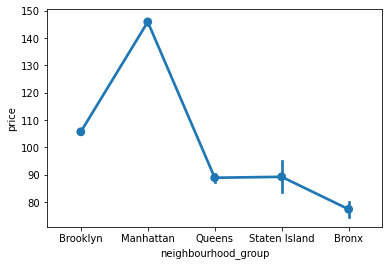

In [21]:
from statistics import mean
sns.pointplot(x='neighbourhood_group', y='price', data=df1, estimator=np.mean)

### Price distribution of each neighbourhood group using violin plot

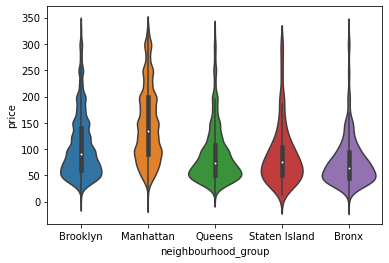

In [22]:
ax = sns.violinplot(x='neighbourhood_group', y='price', data=df1)

### Top 10 hosts with more listings/properties using bar chart

<AxesSubplot:>

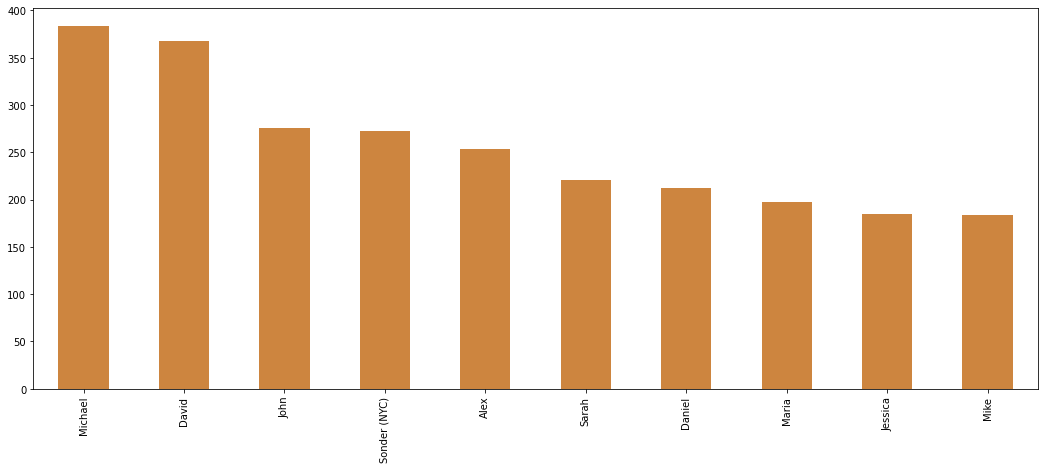

In [23]:
top_hosts = df1['host_name'].value_counts()[:10]
top_hosts.plot(kind='bar', color='peru', figsize=(18,7))

### Total counts of each room type (visualization)

<function matplotlib.pyplot.show(close=None, block=None)>

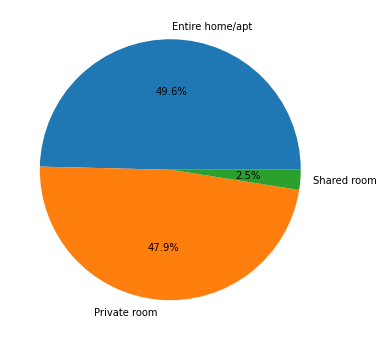

In [24]:
plt.figure(figsize=(12,6))
room_type = df1['room_type'].value_counts()
labels = room_type.index
sizes = room_type.values
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.show

# Business Conclusion
1. Manhattan and Brooklyn have highest demand.
2. Brooklyn as compared to Manhattan has cheaper price
3. Data Suggests that Airbnb rentals are used for short stays
4. Majority of Listing are having entire home or private rooms -- good option to chooose'''